In [52]:
import pdal
import geopandas
from shapely.geometry import Point
import pandas as pd
import matplotlib.pyplot as plt
import folium
import rasterio as rio

In [53]:
import mapclassify as mc
import numpy as np
import laspy
from rasterio import mask

In [54]:
import imageio
import pathlib
import mapclassify as mc

In [55]:
## Plot raster/tif image
# --------------------
def plot_raster(rast_data, title=''):
    """
    Plots raster tif image both in log scale(+1) and original verion
    """
    fig, (axlog, axorg) = plt.subplots(1, 2, figsize=(14,7))
    im1 = axlog.imshow(np.log1p(rast_data)) # vmin=0, vmax=2.1)
#     im2 = axorg.imshow(rast_data)

    plt.title("{}".format(title), fontdict = {'fontsize': 15})  
    plt.axis('off')
    plt.colorbar(im1, fraction=0.03)



In [56]:
from rasterio.plot import plotting_extent
import geopandas as gpd
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep
import os
from glob import glob

In [103]:
# Prepare the landsat bands to be stacked using glob and sort

landsat_bands_data_path = "tif/.tif"
stack_band_paths = glob(landsat_bands_data_path)

In [104]:
stack_band_paths

[]

In [81]:
# Get sample data from EarthPy and setting your home working directory

data_path = et.data.get_data("vignette-landsat")
os.chdir(os.path.join(et.io.HOME, "earth-analytics"))

# Prepare the landsat bands to be stacked using glob and sort

landsat_bands_data_path = "data/vignette-landsat/LC08_L1TP_034032_20160621_20170221_01_T1_sr_band*[2-4]*_crop.tif"
stack_band_paths = glob(landsat_bands_data_path)
stack_band_paths.sort()

# Create output directory and the output path

output_dir = os.path.join("data", "outputs")
if os.path.isdir(output_dir) == False:
    os.mkdir(output_dir)

raster_out_path = os.path.join(output_dir, "raster.tiff")

In [99]:
stack_band_paths

[]

In [82]:
import earthpy.spatial as es
import earthpy.plot as ep

In [68]:
# Stack Landsat bands

os.chdir(os.path.join(et.io.HOME, "earth-analytics"))
array, raster_prof = es.stack(stack_band_paths, out_path=raster_out_path)

In [69]:
extent = plotting_extent(array[0], raster_prof["transform"])

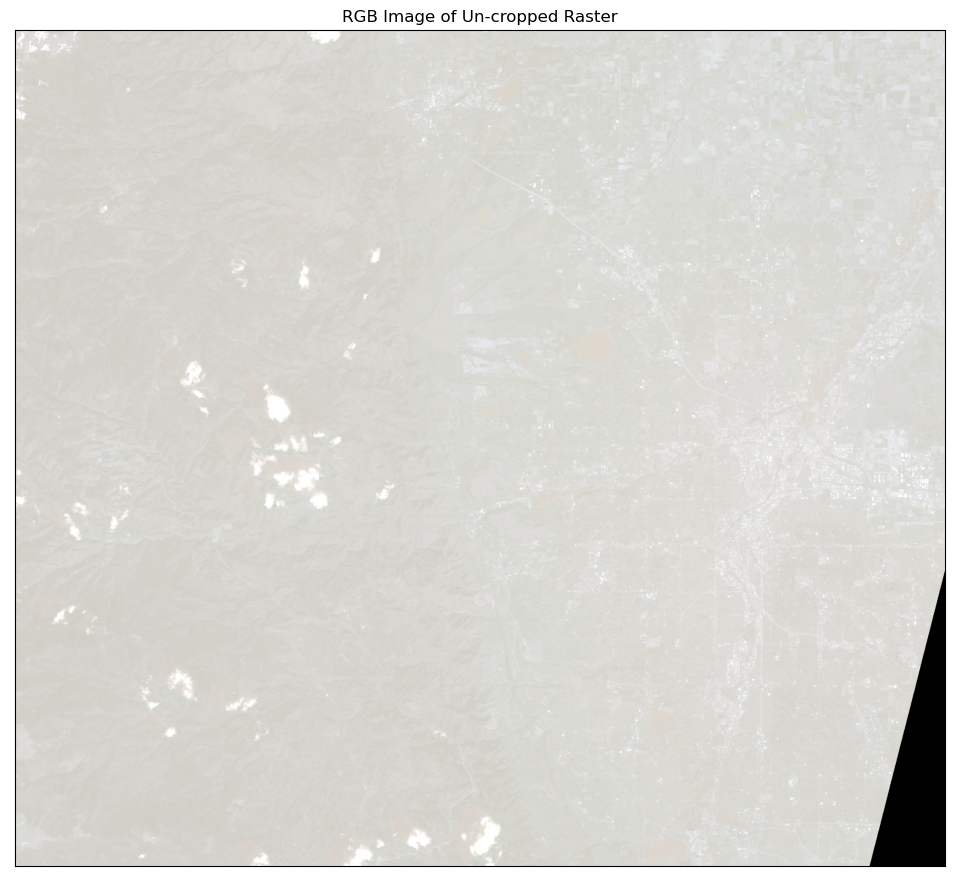

In [70]:
fig, ax = plt.subplots(figsize=(12, 12))
ep.plot_rgb(
    array,
    ax=ax,
    stretch=True,
    extent=extent,
    str_clip=0.5,
    title="RGB Image of Un-cropped Raster",
)
plt.show()

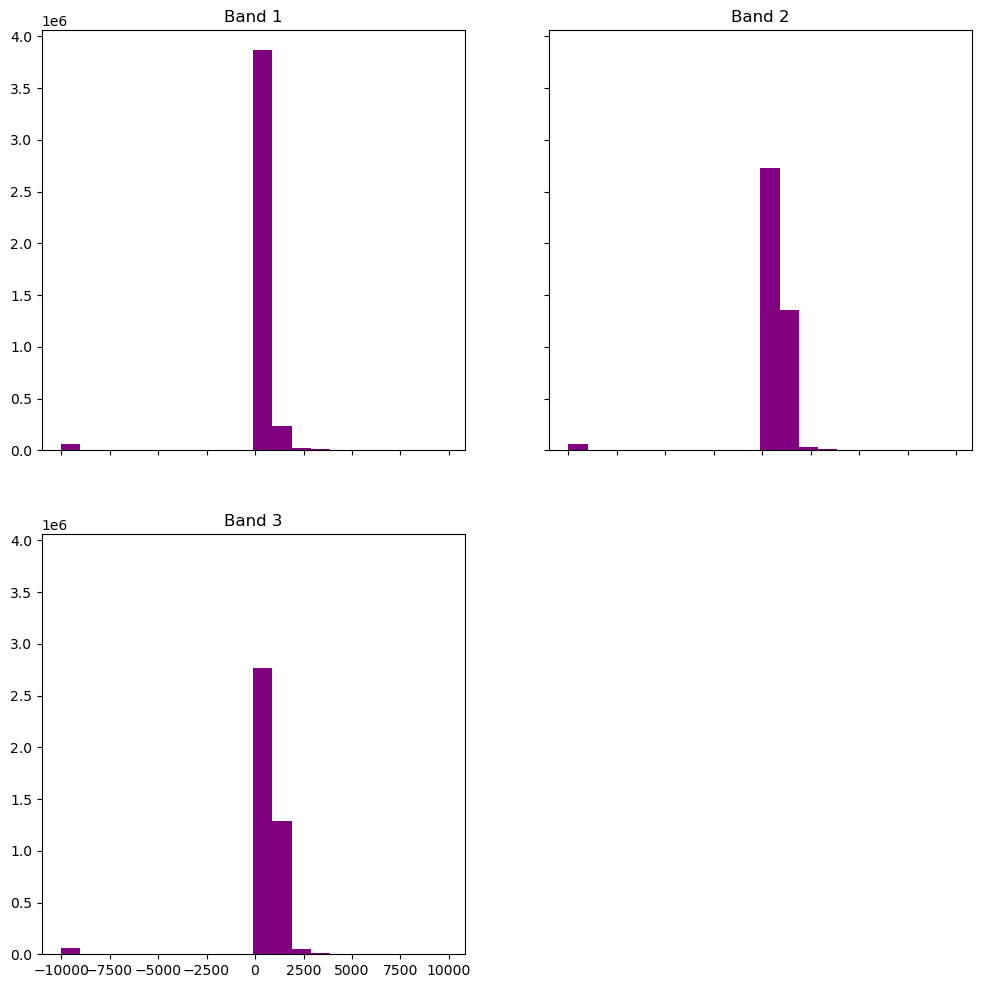

In [71]:
ep.hist(array, title=["Band 1", "Band 2", "Band 3"])
plt.show()

In [72]:
# Open Landsat image as a Rasterio object in order to crop it
os.chdir(os.path.join(et.io.HOME, "earth-analytics"))

with rio.open(stack_band_paths[0]) as src:
    single_cropped_image, single_cropped_meta = es.crop_image(
        src, crop_bound_utm13N
    )

# Create the extent object
single_crop_extent = plotting_extent(
single_cropped_image[0], single_cropped_meta["transform"]
)

# Plot the newly cropped image
fig, ax = plt.subplots(figsize=(12, 6))
crop_bound_utm13N.boundary.plot(ax=ax, color="red", zorder=10)
ep.plot_bands(
    single_cropped_image,
    ax=ax,
    extent=single_crop_extent,
    title="Single Cropped Raster and Fire Boundary",
)
plt.show()

NameError: name 'crop_bound_utm13N' is not defined

In [67]:
src = rasterio.open("tif/SoPlatteRiver.tif")
plt.figure(figsize=(10, 6))
plt.imshow(src.read(1), cmap='pink')
plt.show()

RasterioIOError: tif/SoPlatteRiver.tif: No such file or directory

In [79]:
shps = glob('shp/gadm36_USA_shp/*.shp')
shps.sort()
shapefiles = []
for i in shps:
    usa_gdf = (gpd.GeoDataFrame.from_file(i))

In [80]:
usa_gdf.shape

NameError: name 'usa_gdf' is not defined

In [16]:
m = folium.Map(location=[40.70, -73.94], zoom_start=10, tiles='CartoDB positron')
m

In [8]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,7111024,Europe,Serbia,SRB,101800.0,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,642550,Europe,Montenegro,MNE,10610.0,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1895250,Europe,Kosovo,-99,18490.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1218208,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


<AxesSubplot:>

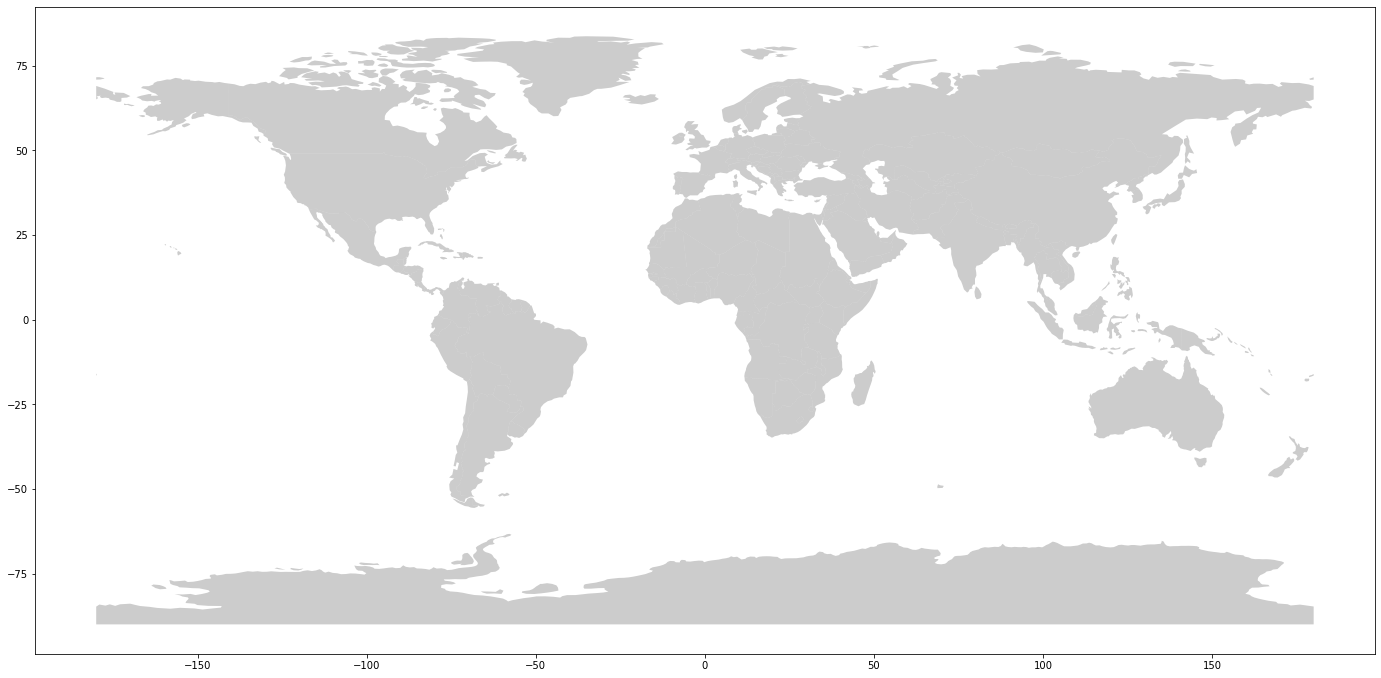

In [9]:
fig, ax = plt.subplots(figsize=(24,18))
world.plot(ax=ax, alpha=0.4, color='grey')

In [94]:
url = "https://s3.amazonaws.com/amazon-reviews-pds/filename "


In [95]:
df = geopandas.read_file(url)

HTTPError: HTTP Error 404: Not Found

In [87]:
# Import packages
import os
import matplotlib.pyplot as plt
import geopandas as gpd
import earthpy.plot as et

# Get data and set working directory
data = et.data.get_data('spatial-vector-lidar')
os.chdir(os.path.join(et.io.HOME, 'earth-analytics'))

AttributeError: module 'earthpy.plot' has no attribute 'data'

In [73]:
import sys
print(sys.executable)

C:\Users\Smegn\anaconda3\anconda2\python.exe


In [74]:
# get shp from tif
from glob import glob
def get_shp_from_tif(tif_path:str, shp_file_path:str) -> None:
    raster = rasterio.open(tif_path)
    bounds = raster.bounds

    df = gpd.GeoDataFrame({"id":1,"geometry":[box(*bounds)]})
   
    # save to file
    df.to_file(shp_file_path)
    print('Saved..')

In [76]:
from shapely.geometry import box
get_shp_from_tif('tif/iowa2.tif', shp_file_path='shp/combi.shp')

RasterioIOError: tif/iowa2.tif: No such file or directory